In [1]:
exec(open("./funcs/mmj_functions.py").read())
exec(open("./funcs/algo_4_funcs.py").read())

In [3]:
# In Method C, we remove the border points.

def MMJ_K_means_select_best_K_method_C(X, mmj_matrix):
    
    global dis_matrix 
    
    score_list = []
    
    mmj_matrix_squared = mmj_matrix**2
    
    K_list = np.arange(2,31)
    
    K_list = [int(i) for i in K_list]
    
    for num_clusters in K_list:
        
        result = MMJ_K_means_using_PAM_algo(X, num_clusters, mmj_matrix_squared, plot = 0)
 
        label, strong_ambi_p_idx, weak_ambi_p_idx = result[0],result[1],result[2] 
 
        border_points = strong_ambi_p_idx + weak_ambi_p_idx
        new_X = np.array([X[i] for i in range(len(X)) if i not in border_points])
        new_label = np.array([label[i] for i in range(len(X)) if i not in border_points])
#         plot_2D_or_3D_data(new_X, new_label)
        new_X_idx = np.array([i for i in range(len(X)) if i not in border_points])
        dis_matrix = np.zeros((len(new_X_idx),len(new_X_idx)))

        for i, idx1 in enumerate(new_X_idx):
            for j, idx2 in enumerate(new_X_idx):
                dis_matrix[i,j] = mmj_matrix[idx1, idx2]
        score = mmj_Silhouette_coefficient(new_X, new_label)
        score_list.append(score)
    best_K = K_list[np.argmax(score_list)]
    
    return best_K, score_list


In [4]:
test_data_145 = pickle.load(  open( "./data/test_data_145.p", "rb" ) ) 
 

best_K:  20


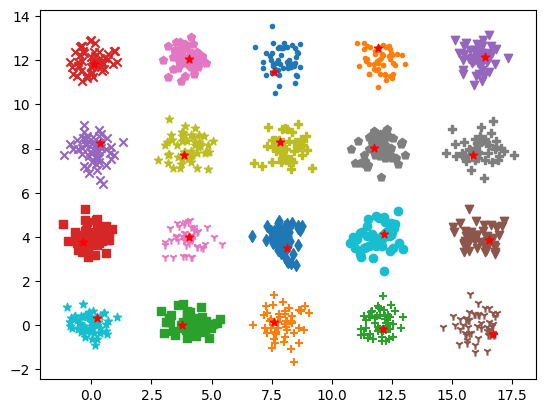

In [5]:
data_id  = 69

X = test_data_145[data_id] 
 
# Calculate MMJ distance matrix with Algorithm 4, implementation and testing of Algorithm 4 see another paper:
# http://www.arxiv.org/abs/2407.07058
mmj_matrix =  cal_mmj_matrix_by_algo_4_Calculation_and_Copy(X)

mmj_matrix_squared = mmj_matrix**2 

# select best_K from range(2,31)
best_K, score_list = MMJ_K_means_select_best_K_method_C(X, mmj_matrix)

print("best_K: ", best_K)

result = MMJ_K_means_using_PAM_algo(X, best_K, mmj_matrix_squared, plot = True)
 

best_K:  3


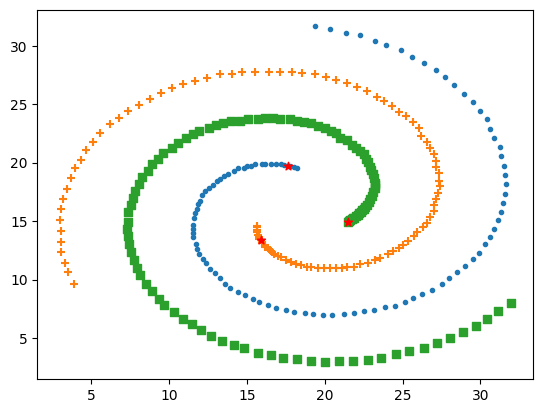

In [6]:
data_id  = 106

X = test_data_145[data_id] 
 
mmj_matrix =  cal_mmj_matrix_by_algo_4_Calculation_and_Copy(X)

mmj_matrix_squared = mmj_matrix**2 

best_K, score_list = MMJ_K_means_select_best_K_method_C(X, mmj_matrix)

print("best_K: ", best_K)

result = MMJ_K_means_using_PAM_algo(X, best_K, mmj_matrix_squared, plot = True)

best_K:  15


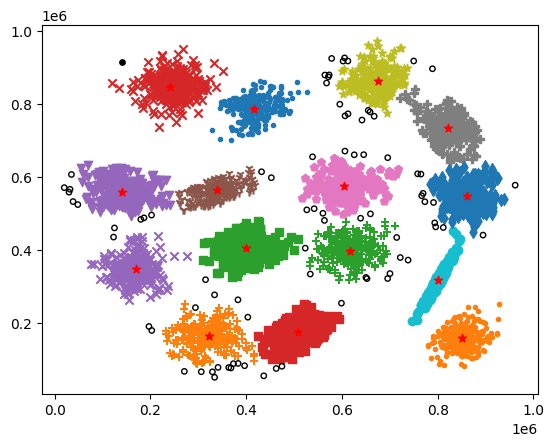

In [7]:
data_id  = 108

X = test_data_145[data_id] 
 
mmj_matrix =  cal_mmj_matrix_by_algo_4_Calculation_and_Copy(X)

mmj_matrix_squared = mmj_matrix**2 

best_K, score_list = MMJ_K_means_select_best_K_method_C(X, mmj_matrix)

print("best_K: ", best_K)

result = MMJ_K_means_using_PAM_algo(X, best_K, mmj_matrix_squared, plot = True)

best_K:  6


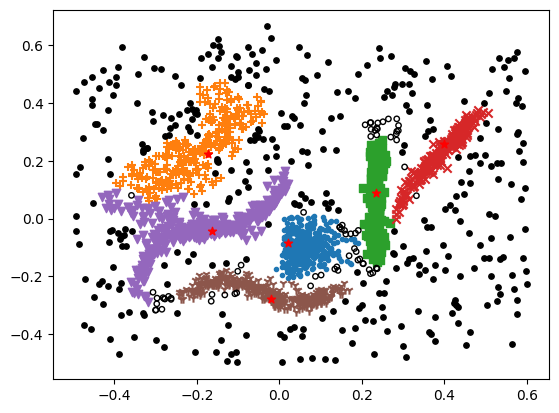

In [9]:
# See the example dataset used by HDBSCAN:
# https://hdbscan.readthedocs.io/en/latest/comparing_clustering_algorithms.html

X = np.load('./data/clusterable_data.npy')

mmj_matrix =  cal_mmj_matrix_by_algo_4_Calculation_and_Copy(X)

mmj_matrix_squared = mmj_matrix**2 

best_K, score_list = MMJ_K_means_select_best_K_method_C(X, mmj_matrix)

print("best_K: ", best_K)

result = MMJ_K_means_using_PAM_algo(X, best_K, mmj_matrix_squared, plot = True)